In [41]:
import nltk;
from nltk.corpus import gutenberg
import re
from nltk.corpus import stopwords
import pandas as pd
import statistics 
import math
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [42]:
files_en = gutenberg.fileids()      # Get file ids
doc_en1 = gutenberg.open('edgeworth-parents.txt').read()
doc_en2 = gutenberg.open('milton-paradise.txt').read()
doc_en3 = gutenberg.open('whitman-leaves.txt').read()
tokens_en1 = re.sub('[^A-Za-z]', ' ', doc_en1)
tokens_en2 = re.sub('[^A-Za-z]', ' ', doc_en2)
tokens_en3 = re.sub('[^A-Za-z]', ' ', doc_en3)
#nltk.download('gutenberg')
tokens_en_lower1 = tokens_en1.lower()
tokens_en_lower2 = tokens_en2.lower()
tokens_en_lower3 = tokens_en3.lower()
from nltk.tokenize import word_tokenize
tokens_en_lower1 = word_tokenize(tokens_en_lower1)
tokens_en_lower2 = word_tokenize(tokens_en_lower2)
tokens_en_lower3 = word_tokenize(tokens_en_lower3)

filtered_words1 = [word for word in tokens_en_lower1 if word not in stopwords.words('english')]
filtered_words2 = [word for word in tokens_en_lower2 if word not in stopwords.words('english')]
filtered_words3 = [word for word in tokens_en_lower3 if word not in stopwords.words('english')]
en1 = nltk.Text(filtered_words1)
en2 = nltk.Text(filtered_words2)
en3 = nltk.Text(filtered_words3)

print(len(en1.tokens))       # returns number of tokens (document length)
print(len(set(en1.tokens)))  # returns number of unique tokens
print(len(en2.tokens)) 
len(filtered_words1)
len(filtered_words2)
len(filtered_words3)

78118
8169
45550


65029

In [43]:
#Segmentation
sampledData1=[]
sampledData2=[]
sampledData3=[]
sampledDataTest =[]
X1 = []
for i in range(0, 200*150,150):
    sampledData1.append(filtered_words1[i:i+150])
for j in range(0, 200*150,150):
    sampledData2.append(filtered_words2[j:j+150])
for k in range(0, 200*150,150):
    sampledData3.append(filtered_words3[k:k+150])
    
sampledData =sampledData1 + sampledData2 + sampledData3
dataframe = pd.DataFrame(sampledData)
dataframe= dataframe.apply(" ".join, axis=1)
dataframe = pd.DataFrame(dataframe)
dataframe.columns = ['Sample']
c = pd.DataFrame({'author':[],'Genre':[]})
frames =[dataframe,c]
MergedFrame = pd.concat(frames)
MergedFrame = MergedFrame[['Sample','author','Genre']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [4]:
dataframe

,Sample
0,parent assistant maria edgeworth orphans near ...
1,good children finished eating suppers came rou...
2,resolved exert utmost first care pay debts mot...
3,charity sake neighbours poor enough bethought ...
4,debt schoolmistress would receive goat said co...
5,round side church saw mary kneeling beside gra...
6,could teach knit supply flax isabella sent nex...
7,largest longest best decayed labourers women c...
8,could made always believed said answer bid wai...
9,wear shoes stockings hurt feet besides waited ...


In [67]:
# Appending label on segments
for i in range(200):
    MergedFrame['Genre'][i] ="Fiction"
    MergedFrame['author'][i] =0
for i in range(200,400):
    MergedFrame['Genre'][i] ="Poetry"
    MergedFrame['author'][i] =1
for i in range(400,600):
    MergedFrame['Genre'][i] ="Tragedy"
    MergedFrame['author'][i] =2
    
#Shuffle


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ip

In [68]:
MergedFrame

,Sample,author,Genre
281,line auran eastward royal towers great seleuci...,1.0,Poetry
594,tables population products would sing ships ca...,2.0,Tragedy
276,stars hide diminished heads thee call friendly...,1.0,Poetry
562,castle keeps plan even raise beyond thy great ...,2.0,Tragedy
386,knowledge god endued sudden apprehension found...,1.0,Poetry
499,tighter vines gushes throats birds hid foliage...,2.0,Tragedy
541,mannahatta singing song ever united lands body...,2.0,Tragedy
330,fly ere evil intercept thy flight said sound w...,1.0,Poetry
383,converse induced new waked soundest sleep soft...,1.0,Poetry
467,back pallid float would avail long run surely ...,2.0,Tragedy


In [45]:
# Transformation to Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
matrixBoW = CountVectorizer(max_features=1000)
XBoW = matrixBoW.fit_transform(MergedFrame['Sample']).todense()
XBoW= pd.DataFrame(XBoW, columns= matrixBoW.get_feature_names())

In [46]:
XBoW

,abbey,able,account,adam,added,advance,afraid,afterwards,age,agent,...,would,wrath,ye,year,years,yellow,yes,yet,young,youth
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,6,0,0,3,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
#Transformation of TFiDF
from sklearn.feature_extraction.text import TfidfVectorizer
matrixTfidf = TfidfVectorizer()
XTfidf = matrixTfidf.fit_transform(MergedFrame['Sample']).todense()
XTfidf= pd.DataFrame(XTfidf, columns= matrixTfidf.get_feature_names())

In [12]:

XTfidf

,aaron,ab,abandon,abandoned,abandonment,abarim,abase,abased,abash,abashed,...,zenith,zephon,zephyr,zephyrus,zeus,zinc,zone,zones,zophiel,zuyder
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.0,0.0,0.098395,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.085019,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7,0.106436,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [47]:
#Direct split into train and test data for BOW
y = MergedFrame['author']
# split train and test data
from sklearn.model_selection import train_test_split
#validation_size =.20
X_train, X_test, y_train, y_test = train_test_split(XBoW, y)

In [14]:
#Direct split into train and test data for TFiDF
y = MergedFrame['author']
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XTfidf, y)


In [48]:
# Classification using Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
accuracy = accuracy_score(y_test, y_pred)
score_nB = cross_val_score(classifier, XBoW, y, cv=10)
accuracy_nB_mean = statistics.mean(score_nB)
f1_score_nB=f1_score(y_test, y_pred, average="macro")
precision_score_nB= precision_score(y_test, y_pred, average="macro")
recall_score_nB=recall_score(y_test, y_pred, average="macro")
print(accuracy_nB_mean)
print(f1_score_nB)
print(precision_score_nB)
print(recall_score_nB)
accuracy_nB_mean=math.ceil(accuracy_nB_mean*100)/100
f1_score_nB = math.ceil(f1_score_nB*100)/100
precision_score_nB= math.ceil(precision_score_nB*100)/100
recall_score_nB = math.ceil(recall_score_nB*100)/100
confusion_matrix_nB = confusion_matrix(y_test, y_pred)

0.9883333333333333
0.9797649463464486
0.9800872885979269
0.9795751633986929


In [336]:
accuracy

0.98

In [56]:
# Classification using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_dT = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_dT.fit(X_train, y_train)
y_pred = clf_dT.predict(X_test)
accuracy_score(y_test,y_pred)*100
accuracy = accuracy_score(y_test, y_pred)
score_dT = cross_val_score(clf_dT, XBoW, y, cv=10)
accuracy_dT_mean = statistics.mean(score_dT)
f1_score_dT=f1_score(y_test, y_pred, average="macro")
precision_score_dT= precision_score(y_test, y_pred, average="macro")
recall_score_dT=recall_score(y_test, y_pred, average="macro")
print(accuracy_dT_mean)
print(f1_score_dT)
print(precision_score_dT)
print(recall_score_dT)
accuracy_dT_mean =math.ceil(accuracy_dT_mean*100)/100
f1_score_dT = math.ceil(f1_score_dT*100)/100
precision_score_dT= math.ceil(precision_score_dT*100)/100
recall_score_dT = math.ceil(recall_score_dT*100)/100
confusion_matrix_dT = confusion_matrix(y_test, y_pred)

0.835
0.8662719047762182
0.8713012477718359
0.8668300653594772


In [49]:
# Classification using SVM 
from sklearn import svm
clf_svm = svm.SVC(gamma='scale')
clf_svm.fit(X_train, y_train)  
y_pred = clf_svm.predict(X_test)
accuracy_score(y_test,y_pred)*100
score_svm = cross_val_score(clf_svm, XBoW, y, cv=10)
accuracy_svm_mean = statistics.mean(score_svm)
f1_score_svm=f1_score(y_test, y_pred, average="macro")
precision_score_svm= precision_score(y_test, y_pred, average="macro")
recall_score_svm=recall_score(y_test, y_pred, average="macro")
print(accuracy_svm_mean)
print(f1_score_svm)
print(precision_score_svm)
print(recall_score_svm)
accuracy_svm_mean= math.ceil(accuracy_svm_mean*100)/100
f1_score_svm = math.ceil(f1_score_svm*100)/100
precision_score_svm= math.ceil(precision_score_svm*100)/100
recall_score_svm = math.ceil(recall_score_svm*100)/100
confusion_matrix_svm = confusion_matrix(y_test, y_pred)

0.99
0.9932632438501582
0.9931972789115647
0.9934640522875817


In [18]:
# Classification using K-Neighbour 
from sklearn.neighbors import KNeighborsClassifier
clf_kN = KNeighborsClassifier(n_neighbors=3)
clf_kN.fit(X_train,y_train)
y_pred= clf_kN.predict(X_test) 
accuracy_score(y_test,y_pred)*100
score_kN = cross_val_score(clf_kN, XBoW, y, cv=10)
accuracy_kN_mean = statistics.mean(score_kN)
f1_score_kN=f1_score(y_test, y_pred, average="macro")
precision_score_kN= precision_score(y_test, y_pred, average="macro")
recall_score_kN=recall_score(y_test, y_pred, average="macro")
print(accuracy_kN_mean)
print(f1_score_kN)
print(precision_score_kN)
print(recall_score_kN)
accuracy_kN_mean = math.ceil(accuracy_kN_mean*100)/100
f1_score_kN = math.ceil(f1_score_kN*100)/100
precision_score_kN= math.ceil(precision_score_kN*100)/100
recall_score_kN = math.ceil(recall_score_kN*100)/100
confusion_matrix_kN = confusion_matrix(y_test, y_pred)

0.8200000000000001
0.9656531508458487
0.9659732922444787
0.967948717948718


In [78]:
#ten fold Cross Validation Function
#Extra Not Required
from sklearn.model_selection import KFold
X = XBoW;
accuracy_dT_all= []
kFold = KFold(n_splits=10, shuffle=True, random_state=None)
for train_index, test_index in kFold.split(X):
    train_data = X.iloc[train_index]
    test_data = X.iloc[test_index]
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    classifier.fit(X_train, y_train)
    clf_dT.fit(X_train, y_train)
    clf_svm.fit(X_train, y_train)
    clf_kN.fit(X_train, y_train)
    y_pred_decision_tree = clf_dT.predict(X_test)
    y_pred_naive_bayes = classifier.predict(X_test)
    y_pred_svm = clf_svm.predict(X_test)
    y_pred_kN = clf_kN.predict(X_test)
    accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
    accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    accuracy_kN = accuracy_score(y_test, y_pred_kN)
    print("accuracy of decision tree:",accuracy_decision_tree)
    print("accuracy of Naive Bayes:",accuracy_naive_bayes)
    print("accuracy of SVM:",accuracy_svm)
    print("accuracy of kN:",accuracy_kN)

accuracy of decision tree: 0.9333333333333333
accuracy of Naive Bayes: 0.9833333333333333
accuracy of SVM: 1.0
accuracy of kN: 0.8
accuracy of decision tree: 0.85
accuracy of Naive Bayes: 0.9833333333333333
accuracy of SVM: 0.95
accuracy of kN: 0.7
accuracy of decision tree: 0.8666666666666667
accuracy of Naive Bayes: 0.9833333333333333
accuracy of SVM: 1.0
accuracy of kN: 0.8333333333333334
accuracy of decision tree: 0.9
accuracy of Naive Bayes: 0.9166666666666666
accuracy of SVM: 1.0
accuracy of kN: 0.8666666666666667
accuracy of decision tree: 0.8666666666666667
accuracy of Naive Bayes: 1.0
accuracy of SVM: 1.0
accuracy of kN: 0.9166666666666666
accuracy of decision tree: 0.7666666666666667
accuracy of Naive Bayes: 0.9666666666666667
accuracy of SVM: 0.9666666666666667
accuracy of kN: 0.7666666666666667
accuracy of decision tree: 0.8
accuracy of Naive Bayes: 0.9833333333333333
accuracy of SVM: 0.9833333333333333
accuracy of kN: 0.7833333333333333
accuracy of decision tree: 0.8166666

In [132]:
data = np.array([['','Average accuracy','Precision','Recall','F-score'],
                ['XBoW NB',accuracy_svm_mean,f1_score_nB,precision_score_nB,recall_score_nB],
                ['XBoW DT',accuracy_dT_mean,f1_score_dT,precision_score_dT,recall_score_dT],['XBoW SVM',accuracy_svm_mean,f1_score_svm,precision_score_svm,recall_score_svm],['XBoW KN',accuracy_kN_mean,f1_score_kN,precision_score_kN,recall_score_kN]])
print(pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:]))


         Average accuracy Precision Recall F-score
XBoW NB              0.99       1.0    1.0     1.0
XBoW DT              0.84      0.85   0.86    0.86
XBoW SVM             0.99      0.99   0.99    0.99
XBoW KN              0.82      0.87    0.9    0.87


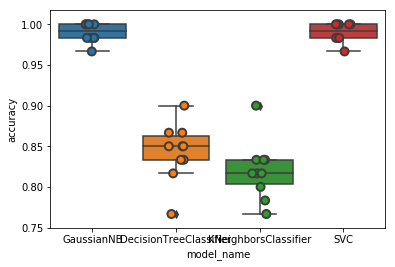

In [24]:
#Accuracy evaluation in ten fold Cross Validation for BOW
models = [
    GaussianNB(),
    DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5),
    KNeighborsClassifier(n_neighbors=3),
    svm.SVC(gamma='scale'),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, XBoW, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_BOW = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df_BOW)
sns.stripplot(x='model_name', y='accuracy', data=cv_df_BOW, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [26]:
# Mean Accuracies for Model Selection
cv_df_BOW.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.843333
GaussianNB                0.990000
KNeighborsClassifier      0.820000
SVC                       0.990000
Name: accuracy, dtype: float64

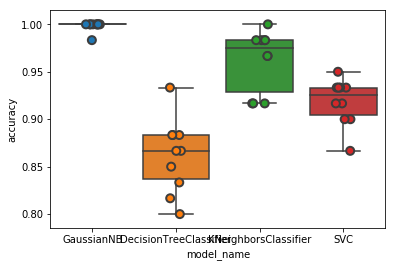

In [28]:
#Accuracy evaluation in ten fold Cross Validation for TFiDF
models = [
    GaussianNB(),
    DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5),
    KNeighborsClassifier(n_neighbors=3),
    svm.SVC(gamma='scale'),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, XTfidf, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df_TFiDF = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df_TFiDF)
sns.stripplot(x='model_name', y='accuracy', data=cv_df_TFiDF, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [29]:
# Mean Accuracies for Model Selection
cv_df_TFiDF.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.861667
GaussianNB                0.998333
KNeighborsClassifier      0.961667
SVC                       0.918333
Name: accuracy, dtype: float64

In [50]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[41  0  0]
 [ 0 57  0]
 [ 0  1 51]]


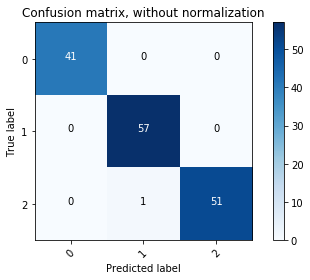

In [39]:
class_names=[0,1,2]
plot_confusion_matrix(confusion_matrix_nB, classes=class_names,
                      title='Confusion matrix, without normalization')


Confusion matrix, without normalization
[[34  0  7]
 [ 0 40 17]
 [ 3  1 48]]


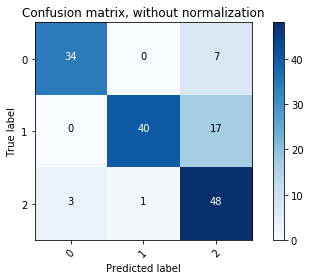

In [32]:
plot_confusion_matrix(confusion_matrix_dT, classes=class_names,
                      title='Confusion matrix, without normalization')


Confusion matrix, without normalization
[[13  0  7]
 [ 0 21  1]
 [ 0  0 18]]


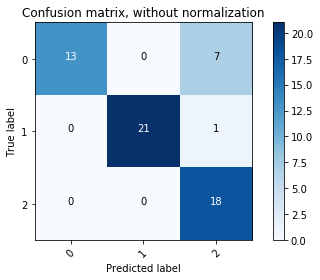

In [146]:
plot_confusion_matrix(confusion_matrix_kN, classes=class_names,
                      title='Confusion matrix, without normalization')


Confusion matrix, without normalization
[[51  0  0]
 [ 0 50  1]
 [ 0  0 48]]


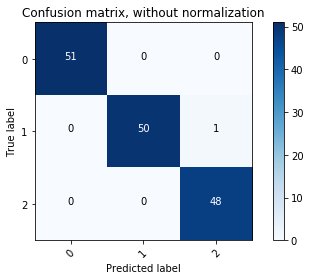

In [51]:
plot_confusion_matrix(confusion_matrix_svm, classes=class_names,
                      title='Confusion matrix, without normalization')

In [21]:
# Classification Report for SVM
from sklearn import metrics
my_tags = ['Edgeworth','Milton','Whitman']
print(metrics.classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

   Edgeworth       0.93      1.00      0.96        41
      Milton       0.97      1.00      0.98        57
     Whitman       1.00      0.90      0.95        52

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [22]:
#Error Analysis
expected = y_test.tolist()
predictions = y_pred.tolist()
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias)

Forecast Errors: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
MAE: 0.053333
MSE: 0.093333
Bias: 0.053333


Text(0, 0.5, 'Predictions')

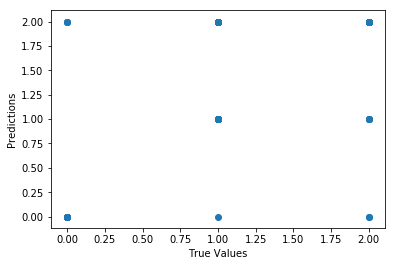

In [57]:
#Data Visualization
from matplotlib import pyplot as plt
predictions = clf_dT.predict(X_test)
predictions[0:50]
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

Text(0, 0.5, 'Errors')

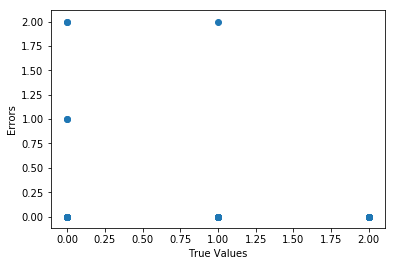

In [53]:
plt.scatter(y_test, forecast_errors)
plt.xlabel('True Values')
plt.ylabel('Errors')